In [1]:
from db import *
from datetime import datetime, timedelta
from dataclasses import dataclass, field

In [2]:
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [3]:
demo_ptl = 'PTL_RD_AT_000'

In [4]:
since = datetime.now() - timedelta(days=2)

In [23]:
p = ErrorPackage
query1 = session.query(p.device, p.create_dtm, p.timestamp) \
                .filter(p.timestamp >= since)
p = InstructionPackage
query2 = session.query(p.device, p.create_dtm, p.timestamp) \
                .filter(p.timestamp >= since)
p = LightingPackage
query3 = session.query(p.device, p.create_dtm, p.timestamp) \
                .filter(p.timestamp >= since)
p = MouseGesturePackage
query4 = session.query(p.device, p.create_dtm, p.timestamp) \
                .filter(p.timestamp >= since)
p = TemperaturePackage
query5 = session.query(p.device, p.create_dtm, p.timestamp) \
                .filter(p.timestamp >= since)
p = HumidityPackage
query6 = session.query(p.device, p.create_dtm, p.timestamp) \
                .filter(p.timestamp >= since)
p = PressurePackage
query7 = session.query(p.device, p.create_dtm, p.timestamp) \
                .filter(p.timestamp >= since)
p = GasPackage
query8 = session.query(p.device, p.create_dtm, p.timestamp) \
                .filter(p.timestamp >= since)
p = BrightnessPackage
query9 = session.query(p.device, p.create_dtm, p.timestamp) \
                .filter(p.timestamp >= since)
p = LoudnessPackage
query10 = session.query(p.device, p.create_dtm, p.timestamp) \
                 .filter(p.timestamp >= since)

query = query1.union(query2) \
              .union(query3) \
              .union(query4) \
              .union(query5) \
              .union(query6) \
              .union(query7) \
              .union(query8) \
              .union(query9) \
              .union(query10)

data = pd.DataFrame(query.all())

KeyboardInterrupt: 

In [24]:
data

create_dtm                  timestamp  \
device                                                                
PTL_DEFAULT   1020   2020-02-20 09:26:01 2020-02-20 09:26:01.595099   
              4867   2020-02-21 15:03:33 2020-02-21 15:03:33.699495   
              4868   2020-02-21 15:03:33 2020-02-21 15:03:33.716444   
              4869   2020-02-21 15:43:13 2020-02-21 15:43:13.825464   
              4870   2020-02-21 15:57:05 2020-02-21 15:57:05.504012   
...                                  ...                        ...   
PTL_RD_ES_009 745954 2020-02-21 14:41:56 2020-02-21 11:28:31.666393   
              745960 2020-02-21 14:49:12 2020-02-21 11:28:37.025856   
              745961 2020-02-21 14:49:15 2020-02-21 11:28:37.026982   
              745962 2020-02-21 14:49:23 2020-02-21 11:28:37.038387   
              745963 2020-02-21 14:49:26 2020-02-21 11:28:37.044801   

                               delay  
device                                
PTL_DEFAULT   1020          00:00:00  
              4867          00:00:00  
              4868          00:00:00  
              4869          00:00:00  
              4870          00:00:00  
...                              ...  
PTL_RD_ES_009 745954 03:13:24.333607  
              745960 03:20:34.974144  
              745961 03:20:37.973018  
              745962 03:20:45.961613  
              745963 03:20:48.955199  

[771214 rows x 3 columns]

In [ ]:
data = data.set_index(['device', data.index]).sort_index()

In [25]:
data['delay'] = data.create_dtm - data.timestamp

In [26]:
data

create_dtm                  timestamp  \
device                                                                
PTL_DEFAULT   1020   2020-02-20 09:26:01 2020-02-20 09:26:01.595099   
              4867   2020-02-21 15:03:33 2020-02-21 15:03:33.699495   
              4868   2020-02-21 15:03:33 2020-02-21 15:03:33.716444   
              4869   2020-02-21 15:43:13 2020-02-21 15:43:13.825464   
              4870   2020-02-21 15:57:05 2020-02-21 15:57:05.504012   
...                                  ...                        ...   
PTL_RD_ES_009 745954 2020-02-21 14:41:56 2020-02-21 11:28:31.666393   
              745960 2020-02-21 14:49:12 2020-02-21 11:28:37.025856   
              745961 2020-02-21 14:49:15 2020-02-21 11:28:37.026982   
              745962 2020-02-21 14:49:23 2020-02-21 11:28:37.038387   
              745963 2020-02-21 14:49:26 2020-02-21 11:28:37.044801   

                                        delay  
device                                         
PTL_DEFAULT   1020   -1 days +23:59:59.404901  
              4867   -1 days +23:59:59.300505  
              4868   -1 days +23:59:59.283556  
              4869   -1 days +23:59:59.174536  
              4870   -1 days +23:59:59.495988  
...                                       ...  
PTL_RD_ES_009 745954          03:13:24.333607  
              745960          03:20:34.974144  
              745961          03:20:37.973018  
              745962          03:20:45.961613  
              745963          03:20:48.955199  

[771214 rows x 3 columns]

In [16]:
data.delay = data.delay.apply(lambda t: max(timedelta(0), t))

In [29]:
data.delay.dtype

dtype('<m8[ns]')

In [31]:
np.maximum(data.delay, np.timedelta64(0))

device               
PTL_DEFAULT    1020            00:00:00
               4867            00:00:00
               4868            00:00:00
               4869            00:00:00
               4870            00:00:00
                              ...      
PTL_RD_ES_009  745954   03:13:24.333607
               745960   03:20:34.974144
               745961   03:20:37.973018
               745962   03:20:45.961613
               745963   03:20:48.955199
Name: delay, Length: 771214, dtype: timedelta64[ns]

In [27]:
np.abs(data.delay)

device               
PTL_DEFAULT    1020     00:00:00.595099
               4867     00:00:00.699495
               4868     00:00:00.716444
               4869     00:00:00.825464
               4870     00:00:00.504012
                              ...      
PTL_RD_ES_009  745954   03:13:24.333607
               745960   03:20:34.974144
               745961   03:20:37.973018
               745962   03:20:45.961613
               745963   03:20:48.955199
Name: delay, Length: 771214, dtype: timedelta64[ns]

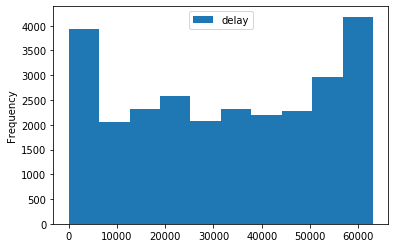

In [88]:
demo_data = data.loc['PTL_RD_ES_009']
demo_data[['delay']].astype('timedelta64[s]').plot.hist()

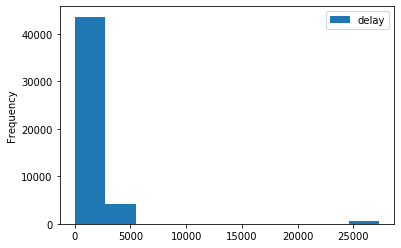

In [85]:
demo_data = data.loc['PTL_RD_AT_000']
demo_data[['delay']].astype('timedelta64[s]').plot.hist()

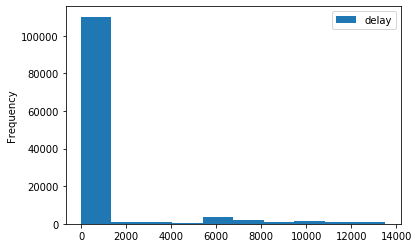

In [86]:
demo_data = data.loc['PTL_RD_ES_001']
demo_data[['delay']].astype('timedelta64[s]').plot.hist()

In [121]:
from plots import plot_histogram

In [127]:
demo_data = data.loc[demo_ptl]

In [171]:
from bokeh.models.formatters import NumeralTickFormatter
from bokeh.models import PrintfTickFormatter

def plot_duration_histogram(data, time_scale: str='s', **kwargs):
    """Plot histogram a sequence of data values

    Parameters:
    -----------
    data: iterable of numeric values
    
    time_scale: one of "ms"-> milli seconds
                       "s" -> seconds
                       "m" -> minutes
                       "h" -> hours
                       "d" -> days

    Optional parameters:
    --------------------

    plot_height: int (default=200)

    plot_width: int (default=200)

    title: str (default='')

    x_axis_label: str (default='')

    y_axis_label: str (default='')

    fill_color: str (default='red')
    line_color: str (default='black')
    """
    scaled_data = data.astype(f'timedelta64[{time_scale}]')
    
    hist_arr, hist_edges = np.histogram(scaled_data)
    hist_df = pd.DataFrame(dict(hist_arr=hist_arr, left=hist_edges[:-1], right=hist_edges[1:]))

    plot_height = kwargs.pop('plot_height', 200)
    plot_width = kwargs.pop('plot_width', 200)
    title = kwargs.pop('title', '')
    x_axis_label = kwargs.pop('x_axis_label', '')
    y_axis_label = kwargs.pop('y_axis_label', '')
    fill_color = kwargs.pop('fill_color', 'red')
    line_color = kwargs.pop('line_color', 'black')

    fig = figure(plot_height=plot_height, plot_width=plot_width,
                 title=title, x_axis_label=x_axis_label, y_axis_label=y_axis_label)
    fig.toolbar.logo = None
    fig.toolbar_location = None
    
    fig.xaxis[0].formatter = PrintfTickFormatter(format="%s" + time_scale)
    fig.yaxis[0].formatter = NumeralTickFormatter(format='0,0')

    fig.quad(bottom=0, top=hist_df.hist_arr, left=hist_df.left, right=hist_df.right,
             fill_color=fill_color, line_color=line_color)
    return fig

In [172]:
fig = plot_duration_histogram(demo_data.delay, time_scale="m", plot_width=800, plot_height=400)
show(fig)